In [1]:
#import the library

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
data = sns.load_dataset('iris')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# EDA through visualization

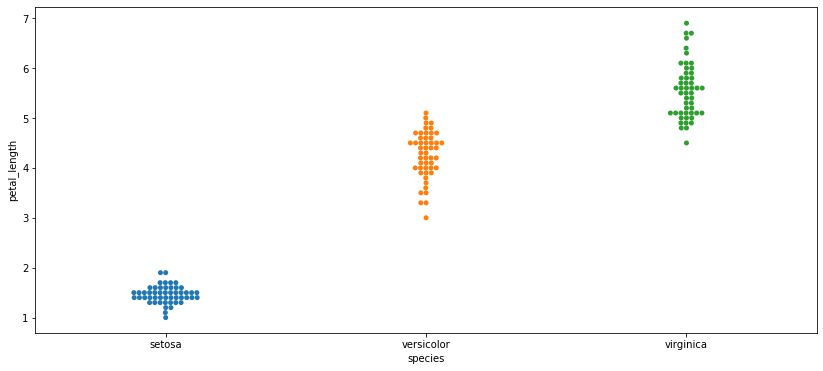

In [8]:
plt.figure(figsize = (14,6))
sns.swarmplot(x = data['species'],
             y = data['petal_length'])

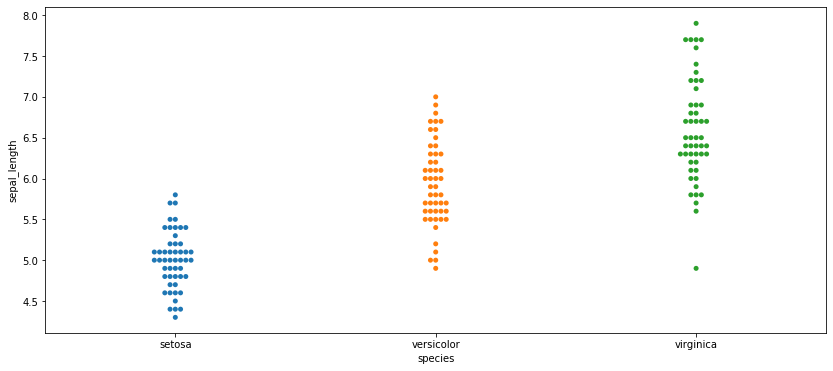

In [9]:
plt.figure(figsize = (14,6))
sns.swarmplot(x = data['species'],
             y = data['sepal_length'])

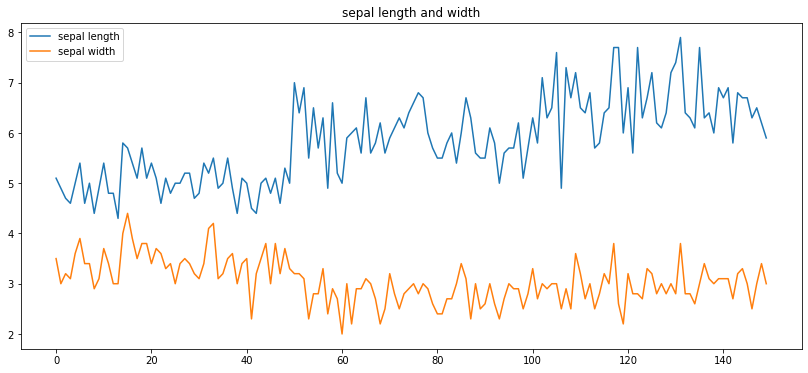

In [11]:
plt.figure(figsize = (14,6))
sns.lineplot(data = data['sepal_length'],
             label ='sepal length')
sns.lineplot(data = data['sepal_width'],
             label ='sepal width')
plt.title('sepal length and width')
plt.show()

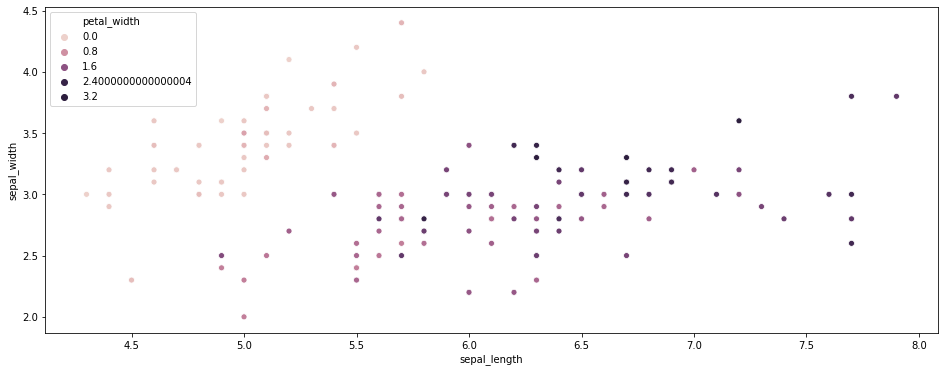

In [12]:
plt.figure(figsize = (16,6))
sns.scatterplot(x = data['sepal_length'],y=data['sepal_width'],hue = data['petal_width'])
plt.show()

In [13]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
x = data.iloc[:,:-1]
y= data.iloc[:,-1]

In [16]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [19]:
from sklearn import preprocessing
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

In [21]:
x_test

array([[ 0.14956537, -0.6062277 ,  0.94476368,  1.91948971],
       [ 0.43000045, -1.93697143,  0.28422975, -0.10102577],
       [-0.27108724,  2.49884101, -1.27703226, -1.25560605],
       [ 2.25282843, -0.38443708,  1.66534614,  1.0535545 ],
       [-0.97217492,  0.72451603, -1.21698372, -1.25560605],
       [ 0.85065306,  0.50272541,  1.48520053,  2.06381224],
       [-0.97217492,  0.94630665, -1.3370808 , -1.11128352],
       [ 1.41152321,  0.05914417,  0.70456952,  0.6205869 ],
       [ 1.55174074, -0.6062277 ,  0.76461806,  0.47626436],
       [ 0.57021798, -0.6062277 ,  0.28422975,  0.33194183],
       [ 0.57021798, -1.04980894,  1.24500637,  0.47626436],
       [ 0.9908706 ,  0.28093479,  0.58447244,  0.6205869 ],
       [ 0.57021798, -0.6062277 ,  0.70456952,  0.18761929],
       [ 1.13108813, -0.6062277 ,  0.64452098,  0.6205869 ],
       [ 0.57021798, -0.38443708,  0.70456952,  0.47626436],
       [-1.11239246,  1.16809728, -1.27703226, -1.39992858],
       [ 0.43000045, -0.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4,metric = 'minkowski',p =2)

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [25]:
from sklearn.metrics import accuracy_score
pred = knn.predict(x_test)
accuracy_score(y_test,pred)

0.9

In [27]:
from sklearn.ensemble import RandomForestClassifier
rdc = RandomForestClassifier(n_estimators = 4, 
                            criterion = 'entropy',
                            random_state = 0)


In [28]:
rdc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
from sklearn.metrics import accuracy_score
pred = rdc.predict(x_test)
accuracy_score(y_test,pred)

0.9333333333333333

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [34]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
from sklearn.metrics import accuracy_score
pred = gnb.predict(x_test)
accuracy_score(y_test,pred)

0.8